In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

###Load and Visualize the data

In [5]:
num_workers = 0
batch_size = 20

# Convert data to torch.FloatTensor
transform = transforms.ToTensor()

train_data = datasets.MNIST(root = 'data', train = True, download= True, transform=transform)
test_data = datasets.MNIST(root= 'data', train= False, download=True, transform = transform)

#Prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size= batch_size, num_workers= num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size= batch_size, num_workers= num_workers)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Visualize the data

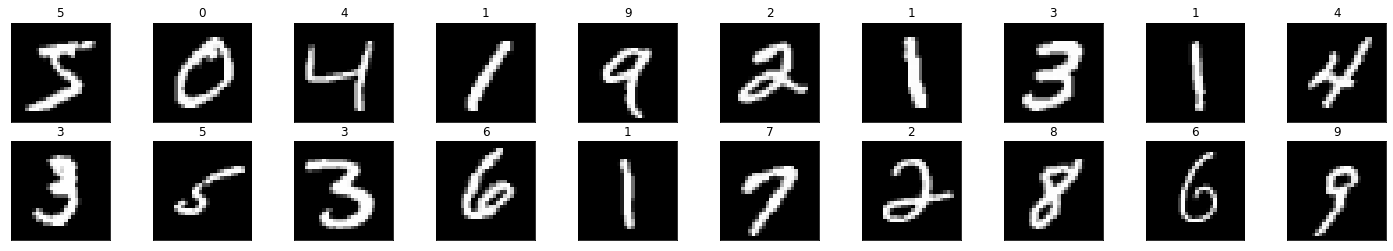

In [7]:
%matplotlib inline

examples = enumerate(train_loader)
batch_idx, (images, labels) = next(examples)

images = images.numpy()

# Ploting the images along with corresponding labels

fig = plt.figure(figsize = (25,4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20/2, idx+1, xticks = [], yticks = [])

  ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
  # Print out the labels 
  ax.set_title(str(labels[idx].item()))

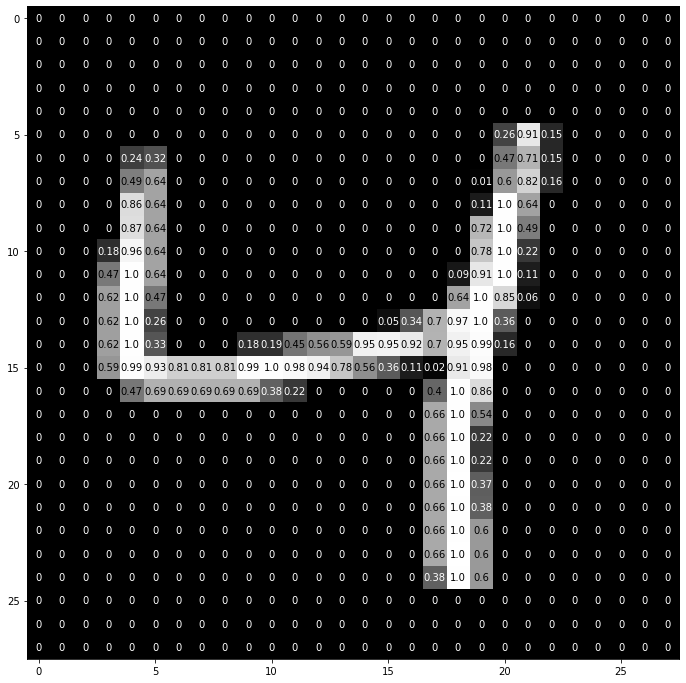

In [12]:
img = np.squeeze(images[2])

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [27]:
# Define architecture

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    # two hidden nodes each of 512 layers
    hidden_1 = 512
    hidden_2 = 512

    #linear layer
    self.fc1 = nn.Linear(28*28, hidden_1)
    self.fc2 = nn.Linear(hidden_1, hidden_2)
    self.fc3 = nn.Linear(hidden_2, 10)

    #Dropout layer
    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
     x = x.view(-1, 28*28)

     # Add relu and dropout  
     x = F.relu(self.fc1(x))
     x = self.dropout(x)

     x = F.relu(self.fc2(x))
     x = self.dropout(x)

     x = F.log_softmax(self.fc3(x), dim = 1)

     return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


## Specify loss function and optimizer

In [28]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

## Train the network

In [30]:
n_epochs = 50
model.train()

for epoch in range(n_epochs):
  train_loss = 0.0
  for batch_idx, (images, labels) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()*images.size(0)

    train_loss = train_loss/len(train_loader)

    print('Epoch: {} \t Training Loss: {:.6f}'.format(epoch+1, train_loss)) 


Streaming output truncated to the last 5000 lines.
Epoch: 49 	 Training Loss: 0.000078
Epoch: 49 	 Training Loss: 0.000028
Epoch: 49 	 Training Loss: 0.000072
Epoch: 49 	 Training Loss: 0.000006
Epoch: 49 	 Training Loss: 0.000016
Epoch: 49 	 Training Loss: 0.000020
Epoch: 49 	 Training Loss: 0.000035
Epoch: 49 	 Training Loss: 0.000092
Epoch: 49 	 Training Loss: 0.000051
Epoch: 49 	 Training Loss: 0.000094
Epoch: 49 	 Training Loss: 0.000010
Epoch: 49 	 Training Loss: 0.000064
Epoch: 49 	 Training Loss: 0.000012
Epoch: 49 	 Training Loss: 0.000013
Epoch: 49 	 Training Loss: 0.000023
Epoch: 49 	 Training Loss: 0.000014
Epoch: 49 	 Training Loss: 0.000093
Epoch: 49 	 Training Loss: 0.000002
Epoch: 49 	 Training Loss: 0.000004
Epoch: 49 	 Training Loss: 0.000028
Epoch: 49 	 Training Loss: 0.000098
Epoch: 49 	 Training Loss: 0.000339
Epoch: 49 	 Training Loss: 0.000008
Epoch: 49 	 Training Loss: 0.000001
Epoch: 49 	 Training Loss: 0.000014
Epoch: 49 	 Training Loss: 0.000026
Epoch: 49 	 T

## Test the Trained Network

In [37]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.054912

Test Accuracy of     0: 99% (971/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 98% (1013/1032)
Test Accuracy of     3: 98% (992/1010)
Test Accuracy of     4: 98% (967/982)
Test Accuracy of     5: 98% (878/892)
Test Accuracy of     6: 98% (943/958)
Test Accuracy of     7: 97% (1006/1028)
Test Accuracy of     8: 97% (951/974)
Test Accuracy of     9: 97% (988/1009)

Test Accuracy (Overall): 98% (9835/10000)


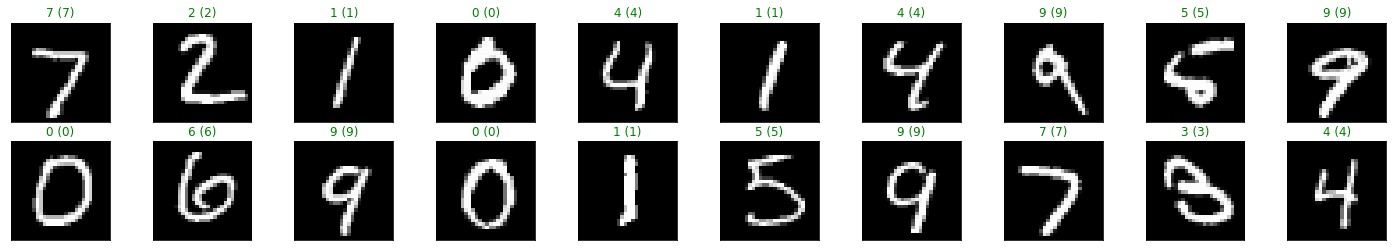

In [39]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
output = model(images)
_,preds = torch.max(output, 1)
images= images.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

# GoogleNet Architecture

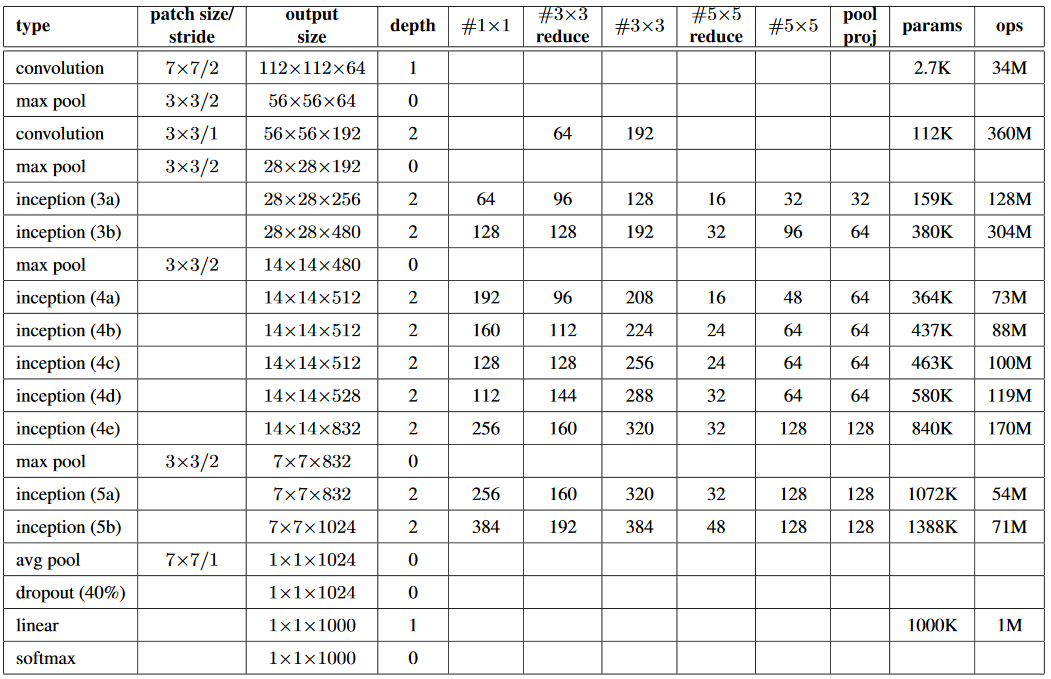

In [7]:
import torch 
import torch.nn as nn

class GoogLeNet(nn.Module):
  def __init__(self, in_channels = 3, num_classes = 1000 ):
    super(GoogLeNet, self).__init__()

    self.conv1    = conv_block(in_channels = in_channels, out_channels = 64, kernel_size=7, stride = 2, padding = 3)
    self.maxpool1 = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
    self.conv2    = conv_block(64,192, kernel_size=3, stride = 1, padding = 1)
    
    self.maxpool2    = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
    self.inception3a = Inception_block(192,64,96,128,16,32,32)
    self.inception3b = Inception_block(256,128,128,192,32,96,64)
    self.maxpool3    = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

    self.inception4a = Inception_block(480,192,96,208,16,48,64)
    self.inception4b = Inception_block(512,160,112,224,24,64,64)
    self.inception4c = Inception_block(512,128,128,256,24,64,64)
    self.inception4d = Inception_block(512,112,144,288,32,64,64)
    self.inception4e = Inception_block(528,256,160,320,32,128,128)
    self.maxpool4    = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

    self.inception5a = Inception_block(832,256,160,320,320,128,128)
    self.inception5b = Inception_block(832,384,192,384,48,128,128)
    self.avgpool     = nn.AvgPool2d(kernel_size= 7, stride = 1)

    self.dropout     = nn.Dropout(p =0.4)

    self.fc1      = nn.Linear(1024,1000)
    


    def forward(self,x):

      x = self.conv1(x)
      x = self.maxpool1(x)
      x = self.conv2(x)

      x = self.maxpool2(x)
      x = self.inception3a(x)
      x = self.inception3b(x)
      x = self.maxpool2(x)

      x = self.inception4a(x)
      x = self.inception4b(x)
      x = self.inception4c(x)
      x = self.inception4d(x)
      x = self.inception4e(x)
      x = self.maxpool3(x)

      x = self.inception5a(x)
      x = self.inception5b(x)
      x = self.avgpool(x)
      x = x.view(x.shape[0], -1)
      x = self.dropout(x)

      x = self.fc1(x)

      return x



class Inception_block(nn.Module):
  def __init__(self, in_channels, out_1x1, red_3x3, out_3x3, red_5x5, out_5x5, out_1x1pool):
    super(Inception_block, self).__init__()

    self.branch1 = conv_block(in_channels, out_1x1, kernel_size = 1)

    self.branch2 = nn.Sequential(
        conv_block(in_channels, red_3x3, kernel_size = 1),
        conv_block(red_3x3, out_3x3, kernel_size = 3, padding = 1)
    )

    self.branch3 = nn.Sequential(
        conv_block(in_channels, red_5x5, kernel_size = 1),
        conv_block(red_5x5, out_5x5, kernel_size = 5)
    )

    self.branch4 = nn.Sequential(
        nn.MaxPool2d(kernel_size = 3, stride = 1, padding = 1),
        conv_block(in_channels, out_1x1pool, kernel_size =1)
    )


# input channels has not changes its 28 * 28. There is only change in the no. of filters
    def forward( self, x):
      # N * filters * 28*28
      return torch.concat([self.branch1(x), self.branch2(x), self.branch3(x), self.branch4(x), 1])


class conv_block(nn.Module):
  def __init__(self, in_channels, out_channels, **kwargs):
    super(conv_block,self).__init__()
    self.relu = nn.ReLU()
    self.conv = nn.Conv2d(in_channels, out_channels, **kwargs)
    self.batchnorm = nn.BatchNorm2d(out_channels)

  def forward(self,x):
    return self.relu(self.batchnorm(self.conv(x)))


if __name__ == '__main__':
  x = torch.randn(3,3,224,224)
  model = GoogLeNet()
  print(model)


GoogLeNet(
  (conv1): conv_block(
    (relu): ReLU()
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2): conv_block(
    (relu): ReLU()
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (inception3a): Inception_block(
    (branch1): conv_block(
      (relu): ReLU()
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch2): Sequential(
      (0): conv_block(
        (relu): ReLU()
        (conv): Conv2d(192, 96, kernel_size